## Assignmnet 5: Principal Components Analysis
### Benchmark testing of alternative modeling approaches using MNIST data set from chapter 3, page 79

#### Based on the F1 scores of the different models and subsets of data, I would recommend using the forest classifier before the PCA transformation since the F1 score was 94%

#### The predictive accuracy must be weighed against the costs of the model development and implementation. Therefore, I would recommend the random forest model since it is faster. The difference in speed is not large enough to use a model with lower accuracy.

In [65]:
import scipy.io
mnist = scipy.io.loadmat('mnist-original.mat')
X, y = mnist['data'].T, mnist['label'].T

#### Observe mnist data

In [66]:
mnist

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]]),
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object)}

#### Review the shape of the predictor variables and the response varaiable

In [67]:
X.shape

(70000, 784)

In [68]:
y.shape

(70000, 1)

#### Observe a sample digit

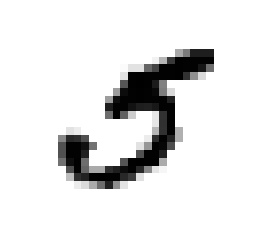

In [69]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [70]:
# see if y can predict the correct value
y[36000]

array([5.])

#### Utilize the first 60,000 as a model development set and the final 10,000 as a holdout test set. Next, we develop a multiclass classifier

In [71]:
X_train, X_test, y_train, y_test = X[: 60000], X[ 60000:], y[: 60000], y[ 60000:]

#### Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model development set of 60,000 observation. Below I walk through a stochastic Grandient Descent classifier model as an example.

In [72]:
import time 
start = time.time()
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

# will use the multiclass classification method
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
end = time.time()
print(end-start)

C:\Users\lcamero\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.818561792373657


#### This model took 9 seconds to run. Next, I predict the response variable and score the model using the F1 score. 

In [74]:
# reshape the y train array
c,r = y_test.shape
y_test = y_test.reshape(c,)

In [115]:
start = time.time()
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
end = time.time()
print(end-start)

24.580405950546265


In [116]:
from sklearn.metrics import f1_score

In [117]:
f1_score(y_train, y_train_predict, average="macro")

0.8669597087235005

#### Next I fit a random forest classifer

In [118]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
end = time.time()
print(end-start)

10.599606275558472


#### This model took 18 seconds to complete. Next, we set up the y train predictor and use the F1 score to find the harmonic mean of precision and recall

In [119]:
start = time.time()
y_train_predict = cross_val_predict(forest_clf, X_train, y_train, cv=3)
end = time.time()
print(end-start)

26.368508338928223


In [120]:
f1_score(y_train, y_train_predict, average="macro")

0.9397497464092263

#### Next use a Multiclass classifier using the K Neighbor

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [122]:
# create the response prediction array
from sklearn.model_selection import cross_val_predict

In [123]:
start = time.time()
y_test_predict = cross_val_predict(knn_clf, X_test, y_test, cv=3)
end = time.time()
print(end-start)

217.35143160820007


In [124]:
f1_score(y_test, y_test_predict, average="macro")

0.9357079587489915

#### Compare test set performance across the two modeling approaches: 784 variable model versus the 95% PCA model. 

#### Execute PCA on the full set of 70,000, generating PCA that represent 95 percent of the variability. It took 5 seconds. 

In [86]:
from sklearn.decomposition import PCA
pca = PCA(X)

In [87]:
start = time.time()
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
end = time.time()
print(end-start)

17.362993240356445


In [88]:
start = time.time()
forest_clf.fit(X_reduced, y)
end = time.time()
print(end-start)

C:\Users\lcamero\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


40.56231999397278


In [89]:
# reshape the y train array
c,r = y.shape
y = y.reshape(c,)

In [90]:
start = time.time()
y_predict = cross_val_predict(forest_clf, X_reduced, y, cv=3)
end = time.time()
print(end-start)

66.93882846832275


In [91]:
f1_score(y, y_predict, average="macro")

0.881805729042257

#### Execute PCA on the set of 60,000 to build another random forest classifier. 

In [92]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
start = time.time()
pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
end = time.time()
print(end-start)

12.896737575531006


In [94]:
start = time.time()
forest_clf.fit(X_reduced_train, y_train)
end = time.time()
print(end-start)

C:\Users\lcamero\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


36.78110384941101


In [105]:
start = time.time()
y_train_predict = cross_val_predict(forest_clf, X_reduced_train, y_train, cv=3)
end = time.time()
print(end-start)

62.59558033943176


In [106]:
y_train.shape

(60000,)

In [107]:
y_train_predict.shape

(60000,)

In [112]:
# reshape the y train array
# c,r = y_train.shape
# y_train = y_train.reshape(c,)

In [114]:
f1_score(y_train, y_train_predict, average="macro")

0.8791328511686146

#### The flaw is that we did not use the test dataset. We refit the models  using the test datasets and rescore. First we set up the random forest o the test dataset. 

In [125]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_test, y_test)
end = time.time()
print(end-start)

1.9611120223999023


In [126]:
start = time.time()
y_test_predict = cross_val_predict(forest_clf, X_test, y_test, cv=3)
end = time.time()
print(end-start)

4.1352362632751465


In [127]:
f1_score(y_test, y_test_predict, average="macro")

0.8906431987279889

#### Set up the PCA model on the test dataset.

In [130]:
pca = PCA()
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [128]:
start = time.time()
pca = PCA(n_components=0.95)
X_reduced_test = pca.fit_transform(X_test)
end = time.time()
print(end-start)

3.0351736545562744


In [129]:
start = time.time()
forest_clf.fit(X_reduced_test, y_test)
end = time.time()
print(end-start)

3.583204746246338


In [131]:
start = time.time()
y_test_predict = cross_val_predict(forest_clf, X_reduced_test, y_test, cv=3)
end = time.time()
print(end-start)

7.81244683265686


In [132]:
f1_score(y_test, y_test_predict, average="macro")

0.7674240306924224